In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

In [2]:
df_maintenance = pd.read_csv("Maintenance.csv")


In [6]:
df_maintenance['last_order_date'] = pd.to_datetime(df_maintenance['last_order_date'])


In [7]:
six = df_maintenance['last_order_date'].max() - pd.DateOffset(months=6)

In [8]:
six = df_maintenance['last_order_date'].max() - pd.DateOffset(months=6)
bloc_a = df_maintenance.loc[df_maintenance['last_order_date'] >= six, :]


In [9]:
bloc_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8198 entries, 2 to 19999
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   mean_delivery_time                            8198 non-null   float64       
 1   mean_review_score                             8198 non-null   float64       
 2   mean_order_price                              8198 non-null   float64       
 3   mean_order_count                              8198 non-null   float64       
 4   num_products                                  8198 non-null   float64       
 5   most_common_payment_type_boleto               8198 non-null   float64       
 6   most_common_payment_type_credit_card          8198 non-null   float64       
 7   most_common_payment_type_infrequent_sklearn   8198 non-null   float64       
 8   city_rio de janeiro                           8198 non-null   float

In [10]:
min_six = df_maintenance['last_order_date'].max() - pd.DateOffset(months=6)

In [11]:
min_six = df_maintenance['last_order_date'].max() - pd.DateOffset(months=6)
cluster_a = df_maintenance.loc[df_maintenance['last_order_date'] <= min_six, :]


In [12]:
cluster_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11802 entries, 0 to 19996
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   mean_delivery_time                            11802 non-null  float64       
 1   mean_review_score                             11802 non-null  float64       
 2   mean_order_price                              11802 non-null  float64       
 3   mean_order_count                              11802 non-null  float64       
 4   num_products                                  11802 non-null  float64       
 5   most_common_payment_type_boleto               11802 non-null  float64       
 6   most_common_payment_type_credit_card          11802 non-null  float64       
 7   most_common_payment_type_infrequent_sklearn   11802 non-null  float64       
 8   city_rio de janeiro                           11802 non-null  floa

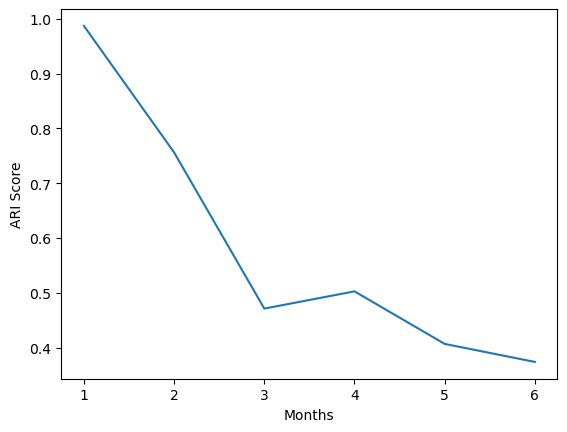

In [13]:
from sklearn.cluster import AgglomerativeClustering
#Permet le calcul ari entre deux ensembles d'étiquettes de cluster
from sklearn.metrics import adjusted_rand_score

# Création d'une liste vide pour stocker le ARI scores
ari_scores = []

# Création du cluster initial pour le test de maintenance last_order_date est retiré car par utilisé pour le cluster initial
cluster_a = AgglomerativeClustering(n_clusters=9, linkage='ward', metric='euclidean').fit(bloc_a.drop('last_order_date', axis=1))
#Récupère les étiquettes de cluster_a
cluster_a_labels = cluster_a.labels_
#Pour chaque bloc de données suivant
for i in range(1, 7):
    
    # Sélectionne le bloc de données correspondant aux commandes passées au cours des i derniers mois moins actuel - i mois et date actuel + i 1 mois
    block_b = df_maintenance.loc[(df_maintenance['last_order_date'] <= min_six) & (df_maintenance['last_order_date'] > min_six - pd.DateOffset(months=i)), :]
    
    #  Concatène les deux blocs de données pour former un nouveau bloc de données donnée tous les mois précedent + mois actuel
    block_a1 = pd.concat([bloc_a, block_b])
    # Crée un nouveau cluster sur le nouveau bloc de données bloc_a1. Les paramètres sont les mêmes que pour le premier cluster
    cluster_a1 = AgglomerativeClustering(n_clusters=9, linkage='ward', metric='euclidean').fit(block_a1.drop('last_order_date', axis=1))
    
    # Récupère les étiquettes de cluster_a1
    cluster_a1_labels = cluster_a1.labels_
  
    # Calcule le score ARI entre l'ensemble d'étiquettes de cluster du premier bloc et du nouveau bloc de données.
    ari_score = adjusted_rand_score(cluster_a_labels, cluster_a1_labels[:len(cluster_a_labels)])
    
    # Ajouter les score à la list ari_score
    ari_scores.append(ari_score)
    
    # Définit le nouveau cluster comme le cluster original pour la prochaine itération
    cluster_a = cluster_a1
    cluster_a_labels = cluster_a.labels_
    block_a = block_a1
    
# Afficher dans un graphique le score ari
plt.plot(range(1, 7), ari_scores)
plt.xlabel('Months')
plt.ylabel('ARI Score')
plt.show()